In [41]:
import numpy as np
import pandas as pd
import pandas_datareader as pdr
from math import sqrt
from sklearn.cluster import KMeans
from matplotlib import pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.spatial.distance import cdist
from sklearn.decomposition import PCA

In [2]:

# #read in the url and scrape ticker data
# all_table = pd.read_csv('Data/nasdaq_all_minus100 .csv')
# all_table

,Symbol,Security
0,AAIT,iShares MSCI All Country Asia Information Tech...
1,AAL,"American Airlines Group, Inc."
2,AAME,Atlantic American Corporation
3,AAOI,"Applied Optoelectronics, Inc."
4,AAON,"AAON, Inc."
...,...,...
2881,ZN,Zion Oil & Gas Inc
2882,ZNGA,Zynga Inc.
2883,ZSPH,"ZS Pharma, Inc."
2884,ZU,"zulily, inc."


In [42]:
#read in the url and scrape ticker data
data_table = pd.read_csv('Data/NASDAQ100.csv')
data_table

,Symbol,Security
0,AMD,Advanced Micro Devices Inc
1,ADBE,Adobe Inc.
2,ALGN,Align Technology Inc
3,AMZN,Amazon.com Inc
4,AMGN,Amgen Inc
...,...,...
98,WBA,Walgreens Boots Alliance Inc
99,WDAY,Workday Inc
100,XEL,Xcel Energy Inc
101,XLNX,Xilinx Inc


In [4]:
# ## Combine the data into a single dataset
# data_table = pd.concat([part_table, all_table], axis=0)
# data_table

,Symbol,Security
0,AMD,Advanced Micro Devices Inc
1,ADBE,Adobe Inc.
2,ALGN,Align Technology Inc
3,AMZN,Amazon.com Inc
4,AMGN,Amgen Inc
...,...,...
2881,ZN,Zion Oil & Gas Inc
2882,ZNGA,Zynga Inc.
2883,ZSPH,"ZS Pharma, Inc."
2884,ZU,"zulily, inc."


In [9]:
# data_table = data_table.iloc[:500,:]
# data_table

,Symbol,Security
0,AMD,Advanced Micro Devices Inc
1,ADBE,Adobe Inc.
2,ALGN,Align Technology Inc
3,AMZN,Amazon.com Inc
4,AMGN,Amgen Inc
...,...,...
392,CACB,Cascade Bancorp
393,CACC,Credit Acceptance Corporation
394,CACG,Chart Acquisition Corp.
395,CACGU,Chart Acquisition Corp.


In [32]:
#data_table.to_csv('Data/nasdaq500.csv', index=False)

In [7]:
#  #read in the url and scrape ticker data
# data_table = pd.read_csv('Data/nasdaq500.csv')
# data_table

,Symbol,Security
0,AMD,Advanced Micro Devices Inc
1,ADBE,Adobe Inc.
2,ALGN,Align Technology Inc
3,AMZN,Amazon.com Inc
4,AMGN,Amgen Inc
...,...,...
495,CACB,Cascade Bancorp
496,CACC,Credit Acceptance Corporation
497,CACG,Chart Acquisition Corp.
498,CACGU,Chart Acquisition Corp.


In [43]:
# ############################ run this once And save the results to a csv. Taked approx. 22 mins 
# ################### Comment after it has executed once. 
# # tickers = company_list
# tickers = data_table['Symbol'].str.strip()

# closing_prices_list = []
# for ticker in tickers:
#     try:
#         prices = pdr.DataReader(ticker,'yahoo','10/21/2020')
#         # print(prices)
#         prices = prices['Close']
#         prices = pd.DataFrame(prices)
#         # print(prices)
#         prices.columns = [ticker]
#         closing_prices_list.append(prices)
#         # print(closing_prices_list)
#     except:
#         pass
#     # print(closing_prices_list)
#     prices_df = pd.concat(closing_prices_list,axis=1)

# prices_df.sort_index(inplace=True)
# prices_df
# prices_df.to_csv("Data/prices_df.csv", index=True)

In [44]:
# the data gathered in the above dataframe and saved to csv file is being retrieved here
fromcsv = pd.read_csv('Data/prices_df.csv')
fromcsv=fromcsv.set_index('Date')
fromcsv

prices_df = fromcsv
prices_df.shape

(254, 103)

In [45]:
prices_df.columns

Index(['AMD', 'ADBE', 'ALGN', 'AMZN', 'AMGN', 'AEP', 'ADI', 'ANSS', 'AAPL',
       'AMAT',
       ...
       'TXN', 'TMUS', 'VRSN', 'VRSK', 'VRTX', 'WBA', 'WDAY', 'XEL', 'XLNX',
       'ZM'],
      dtype='object', length=103)

In [46]:
# prices_df.pct_change()

,AMD,ADBE,ALGN,AMZN,AMGN,AEP,ADI,ANSS,AAPL,AMAT,...,TXN,TMUS,VRSN,VRSK,VRTX,WBA,WDAY,XEL,XLNX,ZM
Date,,,,,,,,,,,,,,,,,,,,,
2020-10-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-22,0.002778,-0.024921,0.349662,-0.002681,-0.004324,0.019911,-0.000080,-0.003294,-0.009583,-0.006601,...,0.014302,-0.006938,0.011189,-0.001586,-0.006150,0.003209,-0.015425,-0.001678,0.015633,0.014322
2020-10-23,0.031982,0.010132,0.036030,0.008815,-0.003597,-0.003471,-0.004409,0.010527,-0.006134,-0.012156,...,0.011739,0.006628,-0.033965,0.001959,0.007140,0.014130,0.014897,0.000840,0.033439,-0.017328
2020-10-26,0.003294,-0.027226,-0.032051,0.000824,-0.009993,0.018611,-0.024718,-0.027921,0.000087,-0.023626,...,-0.026741,-0.005339,-0.011056,-0.019868,-0.020938,-0.021819,-0.061613,0.003078,-0.019432,0.012258
2020-10-27,-0.040739,0.007071,0.001276,0.024724,-0.006359,-0.011326,-0.006935,0.003645,0.013472,-0.011427,...,0.008016,0.009304,0.002417,-0.001833,0.024330,-0.032518,0.018257,0.008927,0.085552,0.040943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-18,0.038441,0.020882,0.009362,0.011065,-0.022662,-0.005989,0.007498,0.005880,0.011806,0.012843,...,0.002366,-0.001531,-0.000280,0.001946,-0.005336,-0.010630,0.006200,-0.018960,0.019384,0.029701
2021-10-19,-0.000859,0.021258,-0.001445,-0.000751,0.017969,0.009760,0.019039,0.014046,0.015080,0.009904,...,0.017033,0.010053,0.005503,0.004786,0.025498,-0.008058,0.016870,0.003865,-0.000880,0.007913
2021-10-20,0.000516,-0.005817,0.023441,-0.008446,0.013928,0.013126,0.001642,-0.001038,0.003361,-0.004606,...,0.005801,0.028509,-0.006262,-0.000566,0.000431,0.007915,-0.000036,0.009857,0.000764,-0.002496


In [47]:
# prices_df.pct_change() # gets the precentage change across column leaving the first row NAN
# (prices_df.pct_change().sum()/len(prices_df)-1)*len(prices_df)
# # this can be replaced by the following

AMD    -253.511001
ADBE   -253.704359
ALGN   -253.316168
AMZN   -253.921084
AMGN   -254.068659
           ...    
WBA    -253.673523
WDAY   -253.713373
XEL    -254.068488
XLNX   -253.480563
ZM     -254.450116
Length: 103, dtype: float64

In [48]:
per_change = prices_df.pct_change().mean()*252
per_change = per_change.to_frame()
per_change

,0
AMD,0.487067
ADBE,0.294472
ALGN,0.681129
AMZN,0.078604
AMGN,-0.068388
...,...
WBA,0.325187
WDAY,0.285494
XEL,-0.068217
XLNX,0.517384


In [50]:
# # change for time intervel
# ((41.248280-27.372362)/27.372362)*100

50.69316999387924

In [51]:
# prices_df.pct_change()

,AMD,ADBE,ALGN,AMZN,AMGN,AEP,ADI,ANSS,AAPL,AMAT,...,TXN,TMUS,VRSN,VRSK,VRTX,WBA,WDAY,XEL,XLNX,ZM
Date,,,,,,,,,,,,,,,,,,,,,
2020-10-21,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2020-10-22,0.002778,-0.024921,0.349662,-0.002681,-0.004324,0.019911,-0.000080,-0.003294,-0.009583,-0.006601,...,0.014302,-0.006938,0.011189,-0.001586,-0.006150,0.003209,-0.015425,-0.001678,0.015633,0.014322
2020-10-23,0.031982,0.010132,0.036030,0.008815,-0.003597,-0.003471,-0.004409,0.010527,-0.006134,-0.012156,...,0.011739,0.006628,-0.033965,0.001959,0.007140,0.014130,0.014897,0.000840,0.033439,-0.017328
2020-10-26,0.003294,-0.027226,-0.032051,0.000824,-0.009993,0.018611,-0.024718,-0.027921,0.000087,-0.023626,...,-0.026741,-0.005339,-0.011056,-0.019868,-0.020938,-0.021819,-0.061613,0.003078,-0.019432,0.012258
2020-10-27,-0.040739,0.007071,0.001276,0.024724,-0.006359,-0.011326,-0.006935,0.003645,0.013472,-0.011427,...,0.008016,0.009304,0.002417,-0.001833,0.024330,-0.032518,0.018257,0.008927,0.085552,0.040943
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-10-18,0.038441,0.020882,0.009362,0.011065,-0.022662,-0.005989,0.007498,0.005880,0.011806,0.012843,...,0.002366,-0.001531,-0.000280,0.001946,-0.005336,-0.010630,0.006200,-0.018960,0.019384,0.029701
2021-10-19,-0.000859,0.021258,-0.001445,-0.000751,0.017969,0.009760,0.019039,0.014046,0.015080,0.009904,...,0.017033,0.010053,0.005503,0.004786,0.025498,-0.008058,0.016870,0.003865,-0.000880,0.007913
2021-10-20,0.000516,-0.005817,0.023441,-0.008446,0.013928,0.013126,0.001642,-0.001038,0.003361,-0.004606,...,0.005801,0.028509,-0.006262,-0.000566,0.000431,0.007915,-0.000036,0.009857,0.000764,-0.002496


In [52]:
per_change = per_change.rename(columns={0:'Returns'})
per_change

,Returns
AMD,0.487067
ADBE,0.294472
ALGN,0.681129
AMZN,0.078604
AMGN,-0.068388
...,...
WBA,0.325187
WDAY,0.285494
XEL,-0.068217
XLNX,0.517384


In [53]:
# # Calculate average annual percentage return and volatilities over a theoretical one year period
# returns = prices_df.pct_change().mean() * 252
# returns = pd.DataFrame(returns)
# returns.columns = ['Returns']
per_change['Volatility'] = prices_df.pct_change().std() * sqrt(252)
per_change

,Returns,Volatility
AMD,0.487067,0.386696
ADBE,0.294472,0.264296
ALGN,0.681129,0.510917
AMZN,0.078604,0.255232
AMGN,-0.068388,0.206091
...,...,...
WBA,0.325187,0.334956
WDAY,0.285494,0.352287
XEL,-0.068217,0.193854
XLNX,0.517384,0.401511


# Clusters with Unscaled Data

In [54]:
distortions = []
inertia = []
k = range(1, 11)
# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(per_change)
    distortions.append(sum(np.min(cdist(per_change, km.cluster_centers_,
                                        'euclidean'), axis=1)) / per_change.shape[0])
    inertia.append(km.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


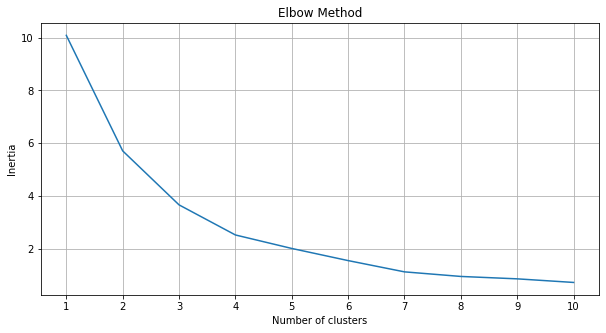

In [58]:
# Create the Elbow Curve
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
plt.figure(figsize=(10, 5))
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
# plt.plot(df_elbow['k'], distortions, 'bx-')
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')

plt.grid(True)
plt.show()

#### Looks like there or 4 or 5 clusters. Let's try scaling the data first

# Clusters with Scaled Data

In [59]:
stock_data_scaled = StandardScaler().fit_transform(per_change)
stock_data_scaled_df = pd.DataFrame(stock_data_scaled)
stock_data_scaled_df.shape
# stock_data_scaled

array([[ 6.68427250e-01,  4.62773312e-01],
       [-4.28314632e-03, -5.05674014e-01],
       [ 1.34626610e+00,  1.44563586e+00],
       [-7.58287067e-01, -5.77390931e-01],
       [-1.27171232e+00, -9.66206057e-01],
       [-1.17067070e+00, -1.21971798e+00],
       [ 3.41251016e-01, -4.44550913e-01],
       [-4.42735279e-01, -1.49978216e-01],
       [-7.20541460e-02, -4.96058773e-01],
       [ 2.01046225e+00,  7.71407971e-01],
       [ 1.76628128e+00,  2.73456249e-01],
       [ 1.76961745e+00,  7.93167351e-01],
       [-1.88627165e-01, -1.58521560e-01],
       [-1.01659652e+00, -4.19713412e-01],
       [ 4.10402043e-01, -9.88848565e-01],
       [ 2.33588866e-01, -4.21802764e-01],
       [ 4.80153362e-01,  1.89624239e+00],
       [-3.03817245e-01,  3.00982598e+00],
       [-1.06318355e+00, -3.41114732e-01],
       [ 3.88887811e-01,  3.41009034e-01],
       [ 5.56966669e-01, -5.66472071e-02],
       [ 4.58361962e-01, -5.86192103e-01],
       [-1.02173909e+00, -1.29353584e+00],
       [-9.

In [60]:
distortions = []
inertia = []
k = range(1, 11)
# Calculate the inertia for the range of k values
for i in k:
    km = KMeans(n_clusters=i, random_state=0)
    km.fit(stock_data_scaled)
    distortions.append(sum(np.min(cdist(stock_data_scaled, km.cluster_centers_,
                                        'euclidean'), axis=1)) / stock_data_scaled.shape[0])
    inertia.append(km.inertia_)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


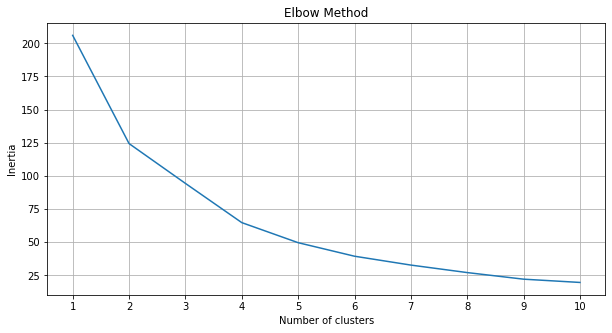

In [61]:
# Create the Elbow Curve using hvPlot
elbow_data = {"k": k, "inertia": inertia}
df_elbow = pd.DataFrame(elbow_data)
plt.figure(figsize=(10, 5))
# Plot the elbow curve to find the best candidate(s) for k
plt.plot(df_elbow['k'], df_elbow['inertia'])
plt.xticks(range(1,11))
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')

plt.grid(True)
plt.show()

In [62]:
# Predicting clusters with k=4

# Initialize the k-means model
model = KMeans(n_clusters=4, random_state=0)

# Fit the model
model.fit(stock_data_scaled)

# Predict clusters
predictions = model.predict(stock_data_scaled)

In [63]:
# Add the predicted cluster column to the dataframe (name it class)
per_change["Cluster"] = model.labels_
per_change["Cluster"].unique()
centroids = model.cluster_centers_
centroids_x = centroids[:,0]
centroids_y = centroids[:,1]


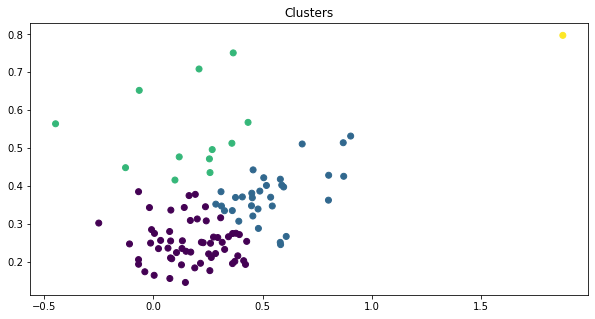

In [64]:
plt.figure(figsize=(10, 5))
plt.scatter(x=per_change['Returns'], y=per_change['Volatility'], c=per_change['Cluster'])

plt.title('Clusters')
plt.show()

In [65]:
per_change = per_change.sort_values(by='Cluster')
per_change = per_change.reset_index()
per_change = per_change.rename(columns={'index':'Stock'})
per_change

,Stock,Returns,Volatility,Cluster
0,MNST,0.078119,0.210580,0
1,MDLZ,0.075034,0.156283,0
2,SBUX,0.284254,0.222034,0
3,DLTR,0.141056,0.343464,0
4,EA,0.132496,0.255675,0
...,...,...,...,...
98,MELI,0.256242,0.471642,2
99,NTES,0.269051,0.496133,2
100,PTON,-0.065098,0.652266,2
101,ZM,-0.448337,0.564173,2


In [66]:
file_path = "Analyzed/nasdaq100_Stocks.csv"
per_change.to_csv(file_path)

# PCA ??
As there were only 2 features , we do not require any dimenssionality reduction

#### uncomment the following cells if you want to check with PCA (Principal component analysis)

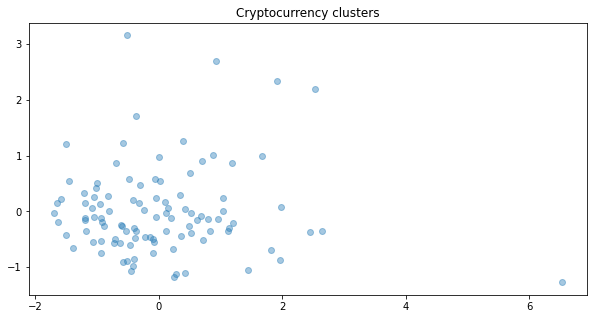

In [67]:
# # Initialize PCA model
# pca = PCA(n_components=0.90)
# stock_data_scaled_df
# stock_data_scaled_df
# # stock_data_scaled
# stock_data_scaled.shape
# stock_data_for_pca = pca.fit_transform(stock_data_scaled)
# stock_data_for_pca.shape
# # stock_data_for_pca
# plt.figure(figsize=(10, 5))
# plt.scatter(x=stock_data_for_pca[:,0], y=stock_data_for_pca[:,1], alpha=0.4)
# plt.title('Cryptocurrency clusters')
# plt.show()

In [68]:
# distortions = []
# inertia = []
# k = range(1, 11)
# # Calculate the inertia for the range of k values
# for i in k:
#     km = KMeans(n_clusters=i, random_state=0)
#     km.fit(stock_data_for_pca)
#     distortions.append(sum(np.min(cdist(stock_data_for_pca, km.cluster_centers_,
#                                         'euclidean'), axis=1)) / stock_data_for_pca.shape[0])
#     inertia.append(km.inertia_)
# # Add the predicted cluster column to the dataframe (name it class)
# per_change["Cluster"] = model.labels_
# per_change["Cluster"].unique()
# centroids = model.cluster_centers_
# centroids_x = centroids[:,0]
# centroids_y = centroids[:,1]
# # Predicting clusters with k=4


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


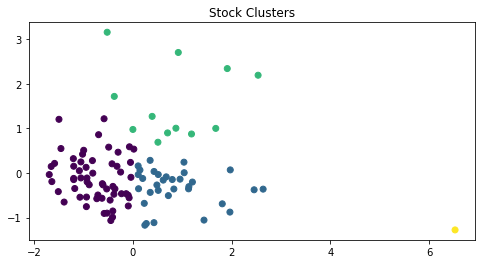

In [69]:

# # Initialize the k-means model
# model = KMeans(n_clusters=4, random_state=0)

# # Fit the model
# model.fit(stock_data_for_pca)

# # Predict clusters
# predictions = model.predict(stock_data_for_pca)
# plt.figure(figsize=(8, 4))
# plt.scatter(x=stock_data_for_pca[:,0], y=stock_data_for_pca[:,1], c=model.labels_)
# plt.title('Stock Clusters')
# plt.show()